# Outline of Monte Carlo Simulation Algorithm in Vasicek Model
## I: Simulation of Short-Rates 
* Step 1: Discretize the setup with N steps and M paths
\begin{equation}
\begin{split}
&t= t_0, \cdots, t_N;\\
&m=1, \cdots, M.
\end{split}
\end{equation}

* Step 2: Simulate the paths of short rates
\begin{equation}
r_{t_i+1}=r_{t_i}+a(b-r_{t_i})\triangle + \sigma\times \sqrt{\triangle}\times \epsilon_{t_{i+1}}, 
\end{equation}
where $\epsilon\sim N(0,1)$. Refer to the variance reduction techinques in Tutorial #6.

## II: Simulated Bond Prices and Yields 
* Step 3: Work out bond price $P(t_i,T)$:
\begin{equation}
P(t_i,T) = \exp(A(t_i,T)-B(t_i,T)t_i,
\end{equation}
where 
\begin{equation}
\begin{split}
B(t_i,T) &= \frac{1-\exp(-a(T-t_i))}{a},\\
A(t_i,T) &= \frac{[B(t_i,T)-(T-t_i)]\gamma}{a^2}-\frac{\sigma^2[B(t_i,T]^2}{4a},\\
\gamma &= a^2b-\sigma^2/2.
\end{split}
\end{equation}
As such, the yield to maturity $y(t_i,T)$ can be worked out:
\begin{equation}
y(t_i,T) = \frac{[A(t_i,T)-B(t_i,T)r_{t_i}]}{T-t_i}.
\end{equation}

## III: Simulated Option Payoffs and Price
* Step 4: Work out the payoff of the call option at maturity $t_i=T$:
\begin{equation}
\max(P(t_i =T,s)-K,0),
\end{equation}
given the bond with the maturity of s.

* Step 5: work out the price of option paths 
\begin{equation}
c=\frac{1}{M}P(0,T)\sum^T_{i=1}[P^m(t_i =T,s)-K]^+,
\end{equation}
where P(0,T) is given by setting $t_i=0$.

In [ ]:
# MTH319 Tutorial No8
# Tasks

# PART I:
#       Conduct a Monte Carlo simulation for Vasicek Model and CIR model by using variance reduction methods

# PART II: 
#       Conduct a standard Monte Carlo simulation for Vasicek Model and CIR model
#       Estimate the dynamics of bond prices over time with simulated rate paths
#       Estimate the dynamics of yields over time with simulated rate paths
#       Estimate the term structure of yileds at time 0<t<T, given T=[0.5, 1, 3, 5, 10, 15, 20, 25, 30]

# PART III:
#       Estimate the price of bond option with simulated rate paths


200
0.008503261473899187
0.008503261473899187 0.008574350528567476 0.0011717636163674704
0.008921149953353377 0.008994871010086192 0.0014164431110977017


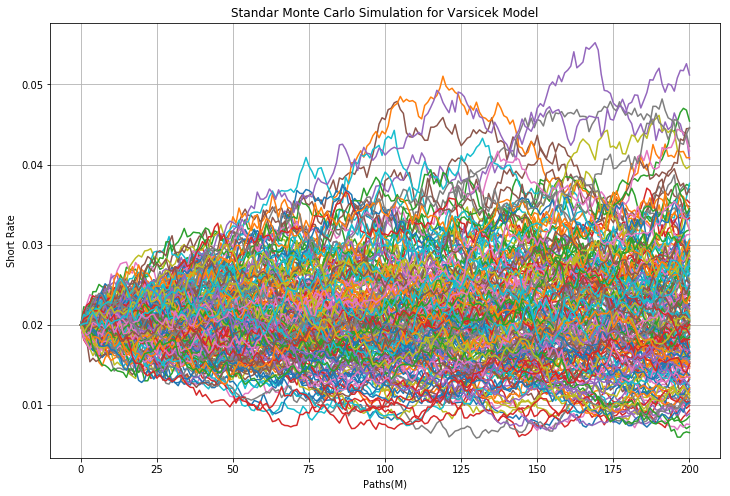

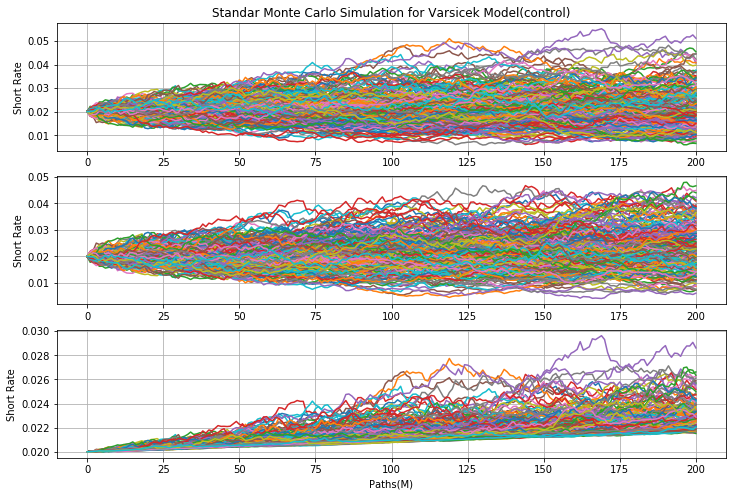

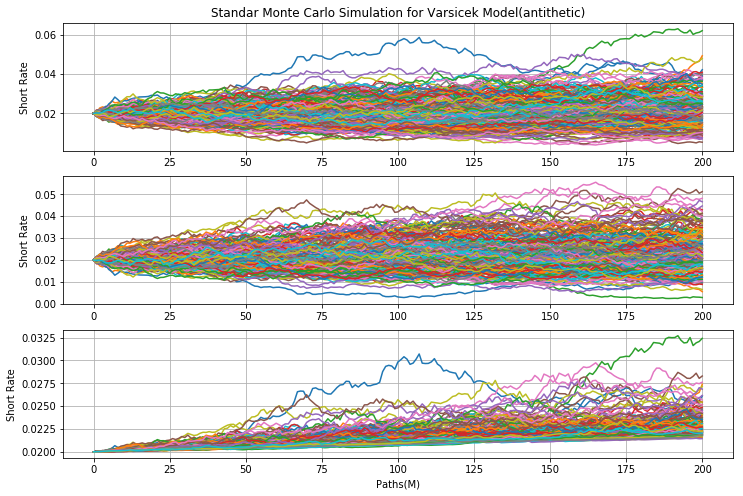

In [61]:
# PART I:

# Tasks:
# Setup
#           dr = a(b-r)dt + sigma*dW  (Vasicek)
#           dr = a(b-r)dt + sigma*sqrt(r)*dW (CIR)

# 1) Simulating S with variance reduction techniques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
 

def EulerMCRates(parameters):
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    
    r = np.zeros((numSteps + 1, numPaths),dtype=float)
    r[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            
            if m_name == 'Vasicek':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(r[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
            
    return r

def EulerMCRates_Control(parameters):
    
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    
    r_1 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_1[0,:] = r_0
    
    r_2 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_2[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            Zs_minus = -Zs
            
            if m_name == 'Vasicek':            
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs_minus # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(r_1[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(r_2[t_step-1,i]*dt)*Zs_minus # CIR model with Euler shceme
            
    return r_1, r_2, (r_1+r_2)/2

    
def EulerMCRates_Antithetic(parameters):  
    
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    
    r_1 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_1[0,:] = r_0
    
    r_2 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_2[0,:] = r_0
    
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            U1 = np.random.rand()  # r.v. from uniform distribution
            Zs_1 = norm.ppf(U1)  # inverse function of a normal distribution
            Zs_2 = norm.ppf(1-U1)            
            #Zs_3 = (Zs_1+Zs_2)/2
            #print('Zs_1=%f, Zs_2=%f, Zs_3=%f'%(Zs_1,Zs_2,Zs_3))
            
            if m_name == 'Vasicek':
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs_1 # Vasicek model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs_2 # 
            elif m_name == 'CIR':
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(r_1[t_step-1,i]*dt)*Zs_1 # CIR model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(r_2[t_step-1,i]*dt)*Zs_2 # 
 
            
    return r_1, r_2, (r_1+r_2)/2

if __name__=="__main__": # main function
    # initial value
    r0 = 0.02
    
    # model parameters
    # a*b>= sigma^2/2 to ensure positivity of short rates
    m_name = 'CIR'  #'Vasicek'
    a = 0.65
    b = 0.03
    sigma = 0.10        
    
    # discrete setup
    T = 0.5     # maturity
    N = 200  # steps
    dt = T/N
    M = 200
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    
    print(parameters['setup']['numSteps'])
    
    # Task 1
    # simulate stock prices
    Sim_r = EulerMCRates(parameters)
    print(np.std(Sim_r[-1,:]))
    
    [Sim_r1, Sim_r2, Sim_r3] = EulerMCRates_Control(parameters)
    print(np.std(Sim_r1[-1,:]),np.std(Sim_r2[-1,:]), np.std(Sim_r3[-1,:]))
    
    [Sim_r4, Sim_r5, Sim_r6] = EulerMCRates_Antithetic(parameters)
    print(np.std(Sim_r4[-1,:]),np.std(Sim_r5[-1,:]), np.std(Sim_r6[-1,:]))
    
#     # plot
    # standard MC
    plt.figure(figsize=(12,8))
    plt.plot(Sim_r)
    plt.grid(True)
    plt.xlabel('Paths(M)')
    plt.ylabel('Short Rate')
    plt.title('Standar Monte Carlo Simulation for Varsicek Model')
    
    # MC with control variates    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1)
    plt.plot(Sim_r1)
    plt.grid(True)
    plt.ylabel('Short Rate')
    plt.title('Standar Monte Carlo Simulation for Varsicek Model(control)')
    
    plt.subplot(3,1,2)
    plt.plot(Sim_r2)
    plt.grid(True)
    plt.ylabel('Short Rate')
    #plt.title('Standar Monte Carlo Simulation for Varsicek Model (-Zs)')
    
    plt.subplot(3,1,3)
    plt.plot(Sim_r3)
    plt.grid(True)
    plt.xlabel('Paths(M)')
    plt.ylabel('Short Rate')
    
    
    # MC wtih antithetic method
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1)
    plt.plot(Sim_r4)
    plt.grid(True)
    plt.ylabel('Short Rate')
    plt.title('Standar Monte Carlo Simulation for Varsicek Model(antithetic)')
    
    plt.subplot(3,1,2)
    plt.plot(Sim_r5)
    plt.grid(True)
    plt.ylabel('Short Rate')
    #plt.title('Standar Monte Carlo Simulation for Varsicek Model (-Zs)')
    
    plt.subplot(3,1,3)
    plt.plot(Sim_r6)
    plt.grid(True)
    plt.xlabel('Paths(M)')
    plt.ylabel('Short Rate')
    
 

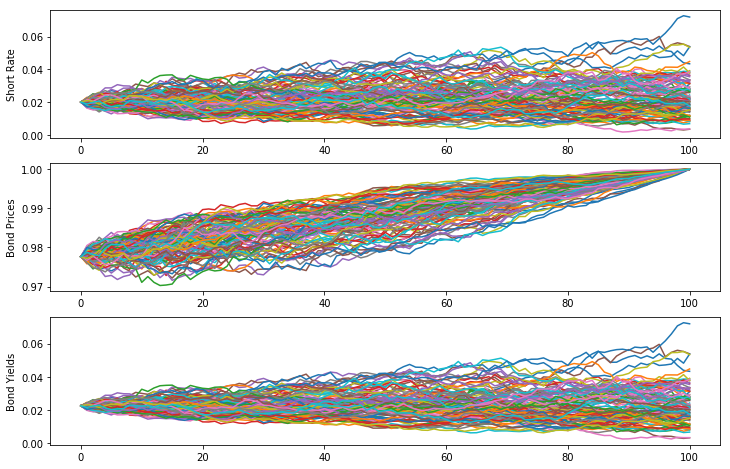

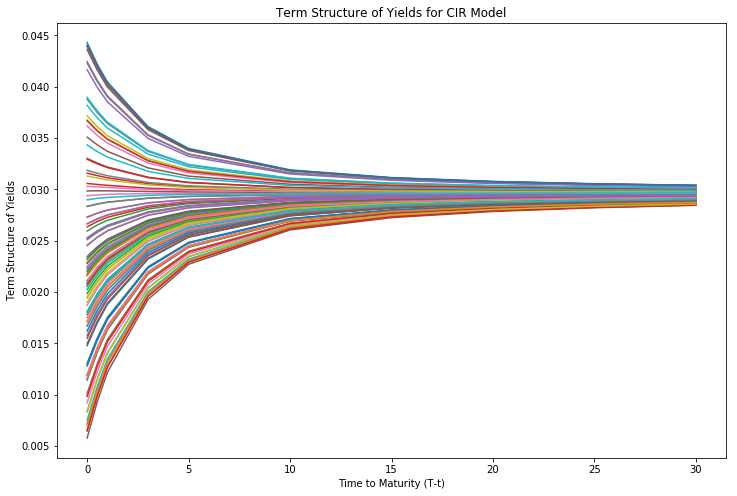

In [5]:
# PART II: short rates and term structure

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def EulerMCRates(parameters):
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    
    r = np.zeros((numSteps + 1, numPaths),dtype=float)
    r[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            
            if m_name == 'Vasicek':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(r[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
            
    return r

def MC_BondPriceYield(MC_short_rates, parameters):
    # Retrieve parameters for the short-rate model from dictionary "parameters"
    T_Maturity = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value

    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

     # Construct A、B、Bond_Price
    A = np.zeros((numSteps+1,1))
    B = np.zeros((numSteps+1,1))
    Bond_Prices = np.zeros((numSteps+1, numPaths))
    Bond_Yields = np.zeros((numSteps+1, numPaths))
    for j in range(numSteps+1):  # in days
        tao_j = T_Maturity - j*dt  # in year -- = (T - t_i)
        
        if m_name == 'Vasicek':
            gamma = a**2*b - sigma**2/2
            B[j][0] = (1-np.exp(-a*tao_j))/a
            A[j][0] = (B[j][0]-tao_j)*gamma/a - sigma**2*B[j][0]**2/(4*a)            
        elif m_name == 'CIR':
            gamma = np.sqrt(a** 2 + 2 * sigma ** 2)            
            B[j][0] = 2 * (np.exp(gamma * tao_j) - 1) / (
                         (gamma + a) * (np.exp(gamma * tao_j) - 1) + 2 * gamma)
            A[j][0] = np.log(np.power(2 * gamma * np.exp((gamma + a) * tao_j / 2) / ((gamma + a) *
                               (np.exp(gamma * tao_j) - 1) + 2 * gamma), 2 * a *b / (sigma ** 2)))
            
            #print('A=%f, B=%f, gamma=%f'%(A[j][0],B[j][0],gamma))
        
        for i in range(numPaths):
            Bond_Prices[j][i] = np.exp(A[j][0] - B[j][0] * MC_short_rates[j][i])  # np.exp(A-B*r)  
            
            if tao_j > 0:
                Bond_Yields[j][i] = -np.log(Bond_Prices[j][i])/tao_j  # -(A[j][0] - B[j][0] * MC_short_rates[j][i])/tao_j  # np.exp(A-B*r)
            else:
                Bond_Yields[j][i] = MC_short_rates[j][i]  # equal to spot rate at t=T
                

    return Bond_Prices,Bond_Yields 

def TermStructure_Giventime(Rates_time_t, T_Maturity, parameters):
    
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value

    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']
    
    n = len(T_Maturity)
    num_t = len(Rates_time_t)

    TS_yields = np.zeros((num_t, n))

    for t  in range(num_t):
        r_t = Rates_time_t[t]
        for T_i in T_Maturity:  # range(1,size(T))
            if T_i == 0:
                TS_yields[t][0] = r_t
            else:
                tao_j = T_i  # in year
                
                if m_name == 'Vasicek':
                    gamma = a**2*b - sigma**2/2
                    B = (1-np.exp(-a*tao_j))/a
                    A = (B-tao_j)*gamma/a - sigma**2*B**2/(4*a)            
                elif m_name == 'CIR':
                    gamma = np.sqrt(a** 2 + 2 * sigma ** 2)            
                    B = 2 * (np.exp(gamma * tao_j) - 1) / (
                                 (gamma + a) * (np.exp(gamma * tao_j) - 1) + 2 * gamma)
                    A = np.log(np.power(2 * gamma * np.exp((gamma + a) * tao_j / 2) / ((gamma + a) *
                                       (np.exp(gamma * tao_j) - 1) + 2 * gamma), 2 * a *b / (sigma ** 2)))
                
                TS_yields[t][T_Maturity.index(T_i)] = -(A - B * r_t) / tao_j
    
    return TS_yields

# main function
if __name__ == '__main__':

    # initial value
    r0 = 0.02
    
    # model parameters
    # a*b>= sigma^2/2 to ensure positivity of short rates
    m_name = 'CIR'  #'Vasicek'
    a = 0.65
    b = 0.03
    sigma = 0.10        
    
    # discrete setup
    T = 1     # maturity
    N = 100  # steps
    dt = T/N
    M = 100
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    
    #       Conduct a standard Monte Carlo simulation for Vasicek Model and CIR model
    MC_short_rates = EulerMCRates(parameters)  # Steps X Paths
    #print(MC_short_rates)
    rs_df = pd.DataFrame(MC_short_rates)
    rs_df.to_csv("MC_short_rates.csv")
    
    #       Estimate the dynamics of bond prices over time with simulated rate paths
    #       Estimate the dynamics of yields over time with simulated rate paths
    [MC_bond_prices, MC_bond_yields] = MC_BondPriceYield(MC_short_rates, parameters)
    #print(MC_bond_yields)
    rs_df = pd.DataFrame(MC_bond_yields)
    rs_df.to_csv("MC_bond_yields.csv")
    
    #       Estimate the term structure of yileds at time 0<t<T, given T=[0.5, 1, 3, 5, 10, 15, 20, 25, 30]    
    Terms = ['0', '0.5', '1', '3', '5', '10', '15', '20', '25', '30']
    T_Maturity = list(map(float, Terms))
    N_t = 50
    
    Rates_t = np.transpose(MC_short_rates)[:,N_t]   # now Paths x Steps
    #print(Rates_t)
    TS_yields = TermStructure_Giventime(Rates_t, T_Maturity, parameters)
    #print(TS_yields)
    
    rs_df = pd.DataFrame(TS_yields)
    rs_df.to_csv("simulated_TS.csv")
    
    #====================================================
    # Plot all results related to short-rate model specification
    plt.figure(figsize=(12, 8))
    plt.title('Short-Rates, Bond Prices and Yields for CIR Model')
    plt.subplot(3, 1, 1)
    plt.plot(MC_short_rates)  # times X paths
    #plt.xlabel('paths')
    plt.ylabel('Short Rate')   

    plt.subplot(3, 1, 2)
    plt.plot(MC_bond_prices)  # times X paths
    plt.ylabel('Bond Prices')
    
    plt.subplot(3, 1, 3)
    plt.plot(MC_bond_yields)  # times X paths
    plt.ylabel('Bond Yields')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    #plt.plot(T_Maturity,TS_yields)
    plt.plot(T_Maturity, np.transpose(TS_yields))

    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields')
    plt.title('Term Structure of Yields for CIR Model')

    plt.show()
    

In [1]:
#PART III: valuation of bond option

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

def BondPrice(rates_t, Tau, parameters):
    # model parameters
    m_name = parameters['model']['name']
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    n = len(rates_t)
    Bond_Prices = np.zeros((n,1))
    
    for j in range(n):  # in days
        r_j = rates_t[j]  # in year
        
        if m_name == 'Vasicek':
            gamma = a**2*b - sigma**2/2
            B = (1-np.exp(-a*Tau))/a
            A = (B-Tau)*gamma/a - sigma**2*B**2/(4*a)            
        elif m_name == 'CIR':
            gamma = np.sqrt(a** 2 + 2 * sigma ** 2)            
            B = 2 * (np.exp(gamma * Tau) - 1) / (
                         (gamma + a) * (np.exp(gamma * Tau) - 1) + 2 * gamma)
            A = np.log(np.power(2 * gamma * np.exp((gamma + a) * Tau / 2) / ((gamma + a) *
                               (np.exp(gamma * Tau) - 1) + 2 * gamma), 2 * a *b / (sigma ** 2)))
            
        Bond_Prices[j] = np.exp(A - B * r_j)  # np.exp(A-B*r)
                
    return Bond_Prices
                

def BondOption_Price_BS(parameters):

    # model parameters
    r_0 = parameters['model']['r0']  # initial value
    
    m_name = parameters['model']['name']
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value 
    
    L = parameters['bond']['L']
    s = parameters['bond']['s']
    
    K = parameters['option']['K']    
    T = parameters['option']['T']    
    option_type = parameters['option']['optype'] 
    
    if m_name == 'Vasicek':
    
        P_0_s = BondPrice(np.asarray([r0]), s, parameters)
        P_0_T = BondPrice(np.asarray([r0]), T, parameters)        
        
        sigma_p = (sigma/a)*(1-np.exp(-a*(s-T)))*np.sqrt((1-np.exp(-2*a*T))/(2*a)) 
        h = (1/sigma_p)*np.log(L*P_0_s/(P_0_T*K)) + sigma_p/2
        
        d1 = h
        d2 = h - sigma_p
        
        if option_type == 1:  # call
            option_price = L*P_0_s* norm.cdf(d1) - K * P_0_T * norm.cdf(d2)
        elif option_type == -1: # put
            option_price = K * P_0_T * norm.cdf(-d2) - L*P_0_s* norm.cdf(-d1) 
    
    return option_price

def EulerMCRates(parameters):
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    
    r = np.zeros((numSteps + 1, numPaths),dtype=float)
    r[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            
            if m_name == 'Vasicek':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(r[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
            
    return r

def MC_bond_option_price(Rate_T, parameters):

    # model parameters
    r_0 = parameters['model']['r0']  # initial value
    
    m_name = parameters['model']['name']
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value 
    
    L = parameters['bond']['L']
    s = parameters['bond']['s']
    
    K = parameters['option']['K']    
    T = parameters['option']['T']    
    option_type = parameters['option']['optype'] 
    
    numPaths = parameters['setup']['numPaths']
    
    if m_name == 'Vasicek':
        P_0 = BondPrice(np.asarray([r0]), T, parameters)
        
        P_T_s = BondPrice(Rate_T, s-T, parameters)
        payoffs = np.maximum(0, (P_T_s- K) if option_type == 1 else (K-P_T_s))
    
    MC_optionprice = P_0*(np.sum(payoffs)/numPaths)
    
    return MC_optionprice

if __name__=="__main__": # main function
    
    r0 = 0.02
    
    # model parameters
    # a*b>= sigma^2/2 to ensure positivity of short rates
    m_name = 'Vasicek'  #''CIR'
    a = 0.65
    b = 0.03
    sigma = 0.10    
    
    L = 1     # principal
    s = 2     # bond maturity
    
    K = 0.50
    T = 1     # option maturity    
    Optype = 1 # 1: call -1: put 
    
    # discrete setup    
    N = 100  # steps
    dt = T/N
    M = 200
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma,'name':m_name},                 
                  'option':{'K':K, 'optype': Optype, 'T':T},
                  'bond':{'L':L, 's':s},
                  'setup':{'T_sim':s, 'numSteps':N, 'dt': s/N, 'numPaths':M}                
                 }
    
    # analytical solutions using BS Formula
    BS_option_prices = BondOption_Price_BS(parameters)
   # print(BS_option_prices)
    
    #  MC for short-rate in Vasicek Model
    MC_short_rates = EulerMCRates(parameters)  # Steps X Paths    
    Option_t_n = int(parameters['option']['T']/parameters['setup']['dt'])
    #print(Option_t_n)
    MC_option_prices =  MC_bond_option_price(MC_short_rates[Option_t_n,:], parameters)
    
    print('BS_price=%f, MC_price=%f in Vasicek Model'%(BS_option_prices,MC_option_prices))
     


BS_price=0.472954, MC_price=0.471506 in Vasicek Model


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.asarray([9])

print(x[0])

9
